# **LOAN APPROVAL - CLASSIFICATION**



**C. Renato Leyton**

The  Classification problem will be assessed using the PyCaret library.

Please note that the files are being uploaded to Drive and not to the local environment.

If running the code, please take in account the file names used and the path where they're saved or loaded from. Thank you.

In [ ]:
pip install git+https://github.com/pycaret/pycaret.git@master

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-9dfkyep1
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-9dfkyep1
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pmdarima to determine which version is compatible with other 

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from pycaret.classification import *

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DM&ML/PREPARED DATA/PART A - Classification/loan_approval_status_data.csv')
dataset.head()

,age,income,home_ownership,emplyment_length,loan_intent,loan_amount,payment_default_on_file,credit_history_length,loan_approval_status
0,40.0,150000,2,9,4,25000,0.0,11,0.0
1,40.0,132000,2,3,5,25000,0.0,17,0.0
2,40.0,80000,2,2,4,25000,0.0,11,0.0
3,40.0,80000,2,9,3,25000,0.0,17,0.0
4,40.0,60000,0,5,3,25000,1.0,12,0.0


In [ ]:
dataset.columns.to_list()

['age',
 'income',
 'home_ownership',
 'emplyment_length',
 'loan_intent',
 'loan_amount',
 'payment_default_on_file',
 'credit_history_length',
 'loan_approval_status']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55696 entries, 0 to 55695
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      55696 non-null  float64
 1   income                   55696 non-null  int64  
 2   home_ownership           55696 non-null  int64  
 3   emplyment_length         55696 non-null  int64  
 4   loan_intent              55696 non-null  int64  
 5   loan_amount              55696 non-null  int64  
 6   payment_default_on_file  55696 non-null  float64
 7   credit_history_length    55696 non-null  int64  
 8   loan_approval_status     55696 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 3.8 MB


In [ ]:
#Check dataset dimensions
dataset.shape

(55696, 9)

In [ ]:
data = dataset

print('Data for Modeling: ' + str(data.shape))

Data for Modeling: (55696, 9)


In [ ]:
#The following setup was coded following lecture seminar for pycaret and chatgpt to make sure numeric and categorical features are correctly recognized.
#RandomState was selected averaging two random numbers given by my parents

In [ ]:
loan = setup(data,target = 'loan_approval_status',
                max_encoding_ohe = 100,
               #fold_strategy = 'kfold',
               #fold = 5,
                data_split_stratify = True ,
                transformation = False,
                train_size = 0.8,
                numeric_features= ['age', 'income', 'emplyment_length', 'loan_amount', 'credit_history_length'],
                categorical_features = ['home_ownership', 'loan_intent', 'payment_default_on_file'],
                normalize = True,
                normalize_method ='minmax',
                session_id = 87)


,Description,Value
0,Session id,87
1,Target,loan_approval_status
2,Target type,Binary
3,Original data shape,"(55696, 9)"
4,Transformed data shape,"(55696, 17)"
5,Transformed train set shape,"(44556, 17)"
6,Transformed test set shape,"(11140, 17)"
7,Numeric features,5
8,Categorical features,3
9,Preprocess,True


# Logistic Regression

Despite of having ```fold strategy``` and `fold` commented in the setup, we will pass a parameter to prevent K-fold, otherwise the model will create 10 folds automatically.



In [ ]:
lr = create_model('lr', cross_validation= False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.8835,0.8348,0.2819,0.7660,0.4121,0.3624,0.4188


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Random Forest

Despite of having ```fold strategy``` and `fold` commented in the setup, we will pass a parameter to prevent K-fold, otherwise the model will create 10 folds automatically.

In [ ]:
rf = create_model('rf', cross_validation= False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.9126,0.8758,0.5056,0.8226,0.6262,0.5799,0.6020


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Testing if it's a good fit

In [ ]:
rf_fit_test = create_model('rf', cross_validation= True, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9105,0.8789,0.4954,0.8142,0.6160,0.5687,0.5912
1,0.9119,0.8801,0.4926,0.8303,0.6184,0.5722,0.5972
2,0.9097,0.8758,0.4833,0.8189,0.6079,0.5606,0.5856
3,0.9089,0.8766,0.4926,0.8020,0.6104,0.5621,0.5835
4,0.9135,0.8877,0.4954,0.8432,0.6241,0.5789,0.6051
Mean,0.9109,0.8798,0.4919,0.8217,0.6153,0.5685,0.5925
Std,0.0016,0.0042,0.0044,0.0141,0.0058,0.0067,0.0079


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Naïve Bayes

Despite of having ```fold strategy``` and `fold` commented in the setup, we will pass a parameter to prevent K-fold, otherwise the model will create 10 folds automatically.

In [ ]:
nb = create_model('nb', cross_validation= False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.7309,0.7869,0.6561,0.3024,0.4140,0.2690,0.3030


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Tunning Random Forest

In [ ]:
autom_tunned_rf = tune_model(rf, )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8550,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8550,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8550,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8550,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8550,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8550,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8552,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8552,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8552,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Automatic Tuning doesn't improve performance. We'll use custom parameters for tunning.

We will try to improve **Recall** as we want to find as many **True Positives** as possible.

The following code was developed by following Seminar 5 and the aid of ChatGPT to force GridSearch CV.

In [ ]:
param_grid = {
    'n_estimators': [200, 600],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
}

tuned_rf = tune_model(
    rf,
    search_library='scikit-learn',
    search_algorithm='grid',
    custom_grid=param_grid,
    fold=5,
    optimize='Recall',
    choose_better = False
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9118,0.8844,0.4837,0.8401,0.6139,0.5682,0.5958
1,0.9140,0.8875,0.4872,0.8581,0.6215,0.5772,0.6067
2,0.9131,0.8851,0.4833,0.8536,0.6172,0.5724,0.6019
3,0.9095,0.8839,0.4795,0.8220,0.6057,0.5586,0.5845
4,0.9157,0.8969,0.4892,0.8741,0.6273,0.5840,0.6154
Mean,0.9129,0.8876,0.4846,0.8496,0.6171,0.5721,0.6009
Std,0.0021,0.0048,0.0034,0.0176,0.0073,0.0086,0.0104


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

While Recall didn't improve, we notice **Less False Positives** while having a slight reduction in **True Positives**

In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=87, verbose=0,
                       warm_start=False)


In [ ]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=600, n_jobs=-1,
                       oob_score=False, random_state=87, verbose=0,
                       warm_start=False)


# **LOAN APPROVAL - REGRESSION**

The  Regression problem will be assessed using the Sklearn library.

In [ ]:
import pandas as pd
import numpy as np

# To transform features into new values
from sklearn import preprocessing

# Import train_test_split function
from sklearn.model_selection import train_test_split

# To construct and plot decision trees
from sklearn import tree
from matplotlib import pyplot as plt

# Import Decision Tree Regressor to predict maximum loan amount
from sklearn.tree import DecisionTreeRegressor

# To optimise the Decision Tree model's hyperparameters
from sklearn.model_selection import GridSearchCV

# Import scikit-learn metrics module for performance metrics
from sklearn import metrics

# To create and plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# To create, calculate and plot the RoC curve
from sklearn.metrics import RocCurveDisplay


Task 1

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DM&ML/PREPARED DATA/PART B - Regression/loan_max_amount_data.csv')
dataset.head()

,age,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,payment_default_on_file,credit_history_length,max_allowed_loan
0,40.0,150000,2,9,4,25000,11.89,0.0,11,25000
1,40.0,132000,2,3,5,25000,16.82,0.0,17,25000
2,40.0,80000,2,2,4,25000,10.25,0.0,11,25000
3,40.0,80000,2,9,3,25000,18.67,0.0,17,25000
4,40.0,60000,0,5,3,25000,11.97,1.0,12,25000


In [ ]:
dataset.columns.to_list()

['age',
 'income',
 'home_ownership',
 'emplyment_length',
 'loan_intent',
 'loan_amount',
 'loan_interest_rate',
 'payment_default_on_file',
 'credit_history_length',
 'max_allowed_loan']

In [ ]:
dataset.shape

(47625, 10)

Task 2

# Plotting Distribution of Variables

In [ ]:
# Histogram plot for Age
Age_fig = px.histogram(dataset, x='age')

# Display the plot
Age_fig.show()

In [ ]:
# Histogram plot for Income
Income_fig = px.histogram(dataset, x='income')

# Display the plot
Income_fig.show()

In [ ]:
# Histogram plot for Home Ownership
Home_ownership_fig = px.histogram(dataset, x='home_ownership')

# Display the plot
Home_ownership_fig.show()

In [ ]:
# Histogram plot for Employment Lenght
Employment_fig = px.histogram(dataset, x='emplyment_length')

# Display the plot
Employment_fig.show()

In [ ]:
# Histogram plot for Loan Intent
Intent_fig = px.histogram(dataset, x='loan_intent')

# Display the plot
Intent_fig.show()

In [ ]:
# Histogram plot for Loan Amount
Amount_fig = px.histogram(dataset, x='loan_amount')

# Display the plot
Amount_fig.show()

In [ ]:
# Histogram plot for Interest Rate
Interest_fig = px.histogram(dataset, x='loan_interest_rate')

# Display the plot
Interest_fig.show()

In [ ]:
# Histogram plot for Payment Default
Default_fig = px.histogram(dataset, x='payment_default_on_file')

# Display the plot
Default_fig.show()

In [ ]:
# Histogram plot for Credit History
History_fig = px.histogram(dataset, x='credit_history_length')

# Display the plot
History_fig.show()

In [ ]:
# Histogram plot for Max Allowed Loan
Max_Loan_fig = px.histogram(dataset, x='max_allowed_loan')

# Display the plot
Max_Loan_fig.show()

In [ ]:
dataset.describe().apply(lambda x: x.apply('{0:.2f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
age,47625.00,27.06,5.20,20.00,23.00,26.00,29.00,52.00
income,47625.00,62232.34,24987.38,4200.00,44000.00,60000.00,75000.00,175500.00
home_ownership,47625.00,1.39,0.60,0.00,1.00,1.00,2.00,3.00
emplyment_length,47625.00,4.73,3.69,0.00,2.00,4.00,7.00,19.00
loan_intent,47625.00,2.15,1.65,0.00,1.00,2.00,3.00,5.00
loan_amount,47625.00,8623.34,4961.95,500.00,5000.00,7875.00,11800.00,26000.00
loan_interest_rate,47625.00,10.25,2.82,5.42,7.51,10.39,12.42,20.11
payment_default_on_file,47625.00,0.12,0.33,0.00,0.00,0.00,0.00,1.00
credit_history_length,47625.00,5.52,3.57,2.00,3.00,4.00,8.00,17.00
max_allowed_loan,47625.00,74160.27,35037.68,232.00,48135.00,67473.00,93972.00,180976.00


# Modelling: Model 1

Using numeric features only

In [ ]:
# Dropping categorical variables
dataset.drop(['home_ownership','loan_intent','payment_default_on_file'],axis=1, inplace=True)


In [ ]:
dataset.head()

,age,income,emplyment_length,loan_amount,loan_interest_rate,credit_history_length,max_allowed_loan
0,40.0,150000,9,25000,11.89,11,25000
1,40.0,132000,3,25000,16.82,17,25000
2,40.0,80000,2,25000,10.25,11,25000
3,40.0,80000,9,25000,18.67,17,25000
4,40.0,60000,5,25000,11.97,12,25000


In [ ]:
# Feature names
dataset.columns.to_list()

['age',
 'income',
 'emplyment_length',
 'loan_amount',
 'loan_interest_rate',
 'credit_history_length',
 'max_allowed_loan']

Defining X and y. Splitting data into Training and Test.

In [ ]:
X = dataset.drop(['max_allowed_loan'], axis=1)
y = dataset['max_allowed_loan']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

In [ ]:
#To see the dimensions

print('Model 1 X Train:',X_train.shape)
print('Model 1 y Train:',y_train.shape)
print('Model 1 X Test:',X_test.shape)
print('Model 1 y Test:',y_test.shape)

Model 1 X Train: (38100, 6)
Model 1 y Train: (38100,)
Model 1 X Test: (9525, 6)
Model 1 y Test: (9525,)


Training the algorithm

In [ ]:
# To train the algorithm use fit method
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, random_state=None, splitter='best')

Making predictions

In [ ]:
# To make predictions on the test set, ues the predict method:
y_pred = regressor.predict(X_test)

# Display the full tree depth
print("The full Regression Decision Tree Levels: ", regressor.tree_.max_depth)

The full Regression Decision Tree Levels:  23


In [ ]:
# Calculating the regression metrics for the fully grown regression decision Tree

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))


Mean Squared Error: 2592956.0972178476
Mean Absolute Error: 703.9682939632546
R2: 0.9978855918638018


# Modelling: Model 2

Using all the features

Reloading our dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DM&ML/PREPARED DATA/PART B - Regression/loan_max_amount_data.csv')

In [ ]:
dataset.head()

,age,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,payment_default_on_file,credit_history_length,max_allowed_loan
0,40.0,150000,2,9,4,25000,11.89,0.0,11,25000
1,40.0,132000,2,3,5,25000,16.82,0.0,17,25000
2,40.0,80000,2,2,4,25000,10.25,0.0,11,25000
3,40.0,80000,2,9,3,25000,18.67,0.0,17,25000
4,40.0,60000,0,5,3,25000,11.97,1.0,12,25000


In [ ]:
dataset.shape

(47625, 10)

In [ ]:
# Feature names
dataset.columns.to_list()

['age',
 'income',
 'home_ownership',
 'emplyment_length',
 'loan_intent',
 'loan_amount',
 'loan_interest_rate',
 'payment_default_on_file',
 'credit_history_length',
 'max_allowed_loan']

Defining X and y. Splitting data into Training and Test.

In [ ]:
X = dataset.drop(['max_allowed_loan'], axis=1)
y = dataset['max_allowed_loan']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

In [ ]:
#To see the dimensions

print('Model 2 X Train:',X_train.shape)
print('Model 2 y Train:',y_train.shape)
print('Model 2 X Test:',X_test.shape)
print('Model 2 y Test:',y_test.shape)

Model 2 X Train: (38100, 9)
Model 2 y Train: (38100,)
Model 2 X Test: (9525, 9)
Model 2 y Test: (9525,)


In [ ]:
# To train the algorithm use fit method
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, random_state=None, splitter='best')

In [ ]:
# To make predictions on the test set, ues the predict method:
y_pred = regressor.predict(X_test)

# Display the full tree depth
print("The full Regression Decision Tree Levels: ", regressor.tree_.max_depth)

The full Regression Decision Tree Levels:  23


In [ ]:
# Calculating the regression metrics for the fully grown regression decision Tree

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 2719232.7269291338
Mean Absolute Error: 734.3779527559055
R2: 0.9977826204584781


# Model 1 Tuning

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DM&ML/PREPARED DATA/PART B - Regression/loan_max_amount_data.csv')

In [ ]:
# Dropping categorical variables
dataset.drop(['home_ownership','loan_intent','payment_default_on_file'],axis=1, inplace=True)

In [ ]:
dataset.head()

,age,income,emplyment_length,loan_amount,loan_interest_rate,credit_history_length,max_allowed_loan
0,40.0,150000,9,25000,11.89,11,25000
1,40.0,132000,3,25000,16.82,17,25000
2,40.0,80000,2,25000,10.25,11,25000
3,40.0,80000,9,25000,18.67,17,25000
4,40.0,60000,5,25000,11.97,12,25000


Defining X and y. Splitting data into Training and Test.

In [ ]:
X = dataset.drop(['max_allowed_loan'], axis=1)
y = dataset['max_allowed_loan']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

Pruning the Decission Tree

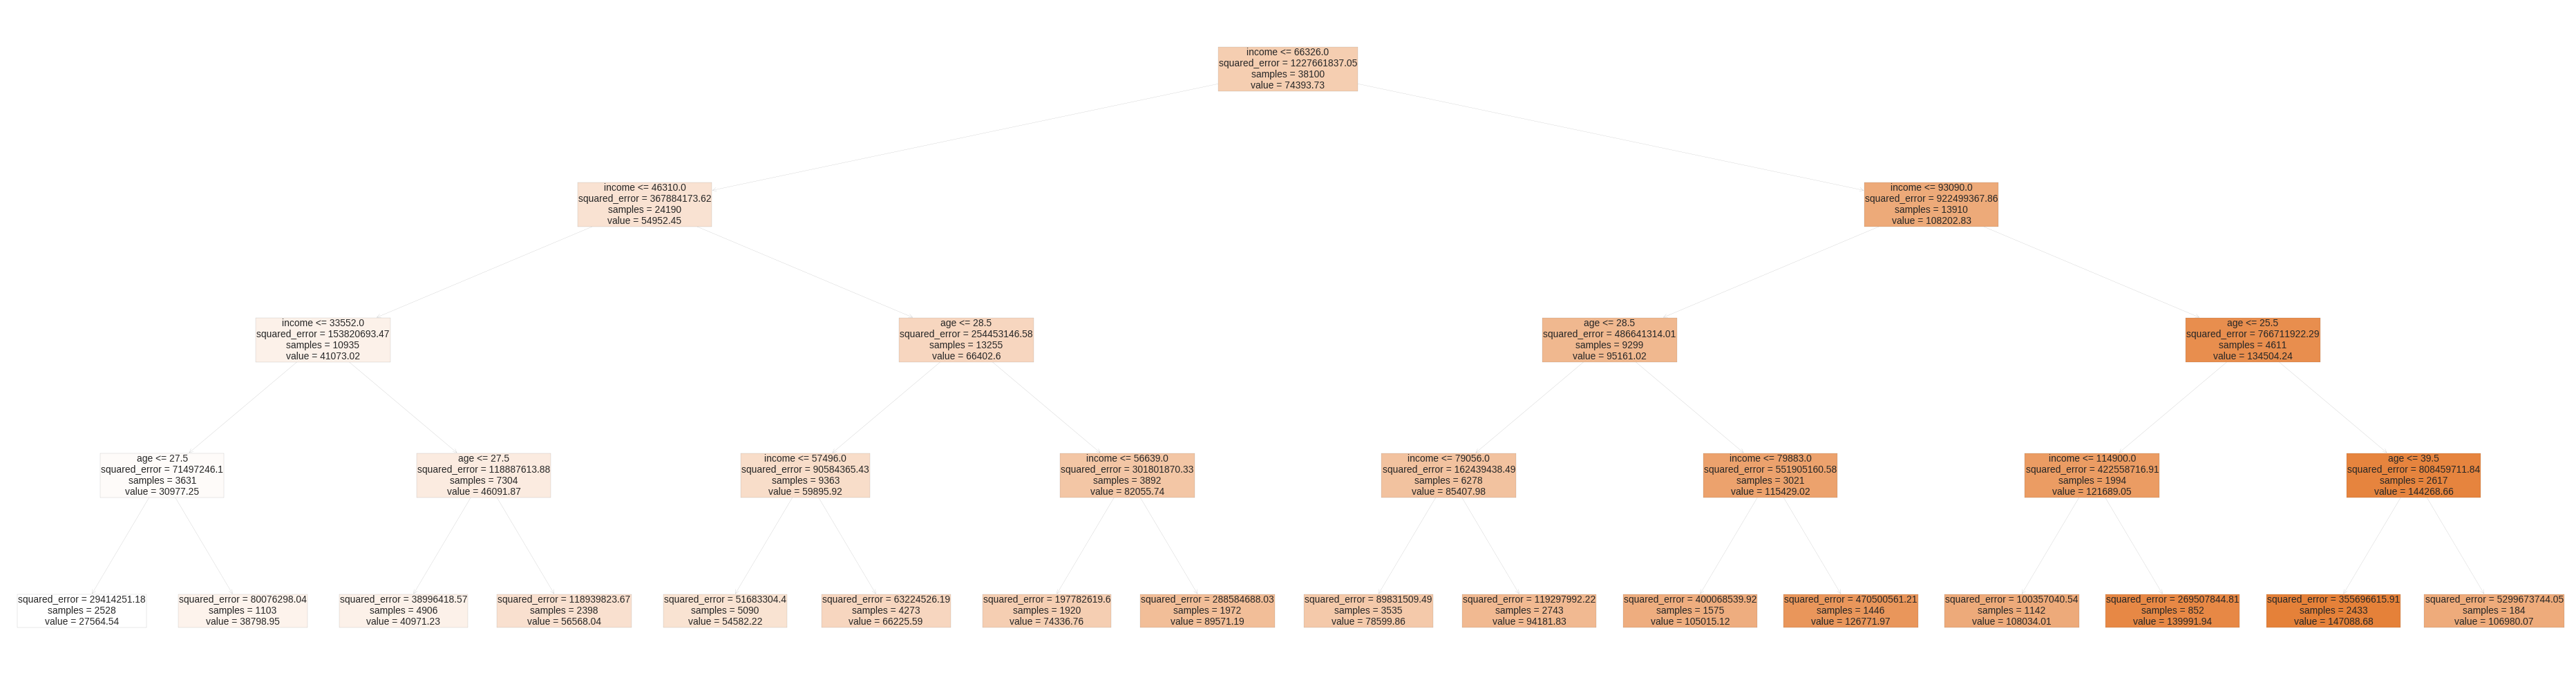

In [ ]:
#Following Seminar 6 and aided by ChatGPT to customize the plot
# Limit the tree growth to 4 levels
pruned_regressor = DecisionTreeRegressor(max_depth=4)
pruned_regressor.fit(X_train, y_train)

# To make predictions on the test set, ues the predict method:
y_pred_pruned = pruned_regressor.predict(X_test)

# Plot the regression DT
pruned_Tree_model = plt.figure(figsize=(190,50), dpi=20)
pruned_Tree_model_Graph = tree.plot_tree(pruned_regressor, feature_names=list(X_train.columns), filled=True, fontsize=50, precision=2)

plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
plt.show()

#To save the DT graph as a png image
pruned_Tree_model.savefig("/content/drive/MyDrive/DM&ML/PREPARED DATA/PART B - Regression/Prunned_Decision_Tree.png")


In [ ]:
# Calculating the regression metrics for the pruned regression decision Tree

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_pruned))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_pruned))
print('R2:', metrics.r2_score(y_test, y_pred_pruned))


Mean Squared Error: 160487165.28019536
Mean Absolute Error: 8330.751656303304
R2: 0.8691318497879985


#Predicting on a new customer

In [ ]:
# Create a new DataFrame from scratch to predict Max Loan Amount
new_customer = []
new_customer.append( {
             #"id":60256,
              "age":56,
             #"Sex":"F",
             #"Education_Qualifications":"Unknown",
              "income":57000,
             #"home_ownership":"rent",
              "emplyment_length":15,
             #"loan_intent":1,
              "loan_amount":25700,
              "loan_interest_rate":23,
             #"loan_income_ratio":10,
             #"payment_default_on_file":"No",
              "credit_history_length":35,
             #"loan_approval_status":"Approved",
             #"max_allowed_loan":value,
             #"Credit_Application_Acceptance":0
             } )
customer_to_predict = pd.DataFrame(new_customer)

# Add a new column to customer_to_predict with the predicted prices:
customer_to_predict["max_allowed_loan"] = pruned_regressor.predict(customer_to_predict)
customer_to_predict.head()


,age,income,emplyment_length,loan_amount,loan_interest_rate,credit_history_length,max_allowed_loan
0,56,57000,15,25700,23,35,89571.188641
